
## 概述

### Kaggle房价预测比赛(高级技能篇)
notebook的背景是[kaggle房价预测比赛高级回归技能篇](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

背景搬运如下：

![](kaggle_house_price.png)

这个notebook主要是通过数据探索和数据可视化来实现。

我们把这个过程叫做EDA（(Exploratory Data Analysis，探索性数据分析），它往往是比较枯燥乏味的工作。

但是你在理解、清洗和准备数据上花越多的时间，你的预测模型就会越加精准。
 
1) **概述**

  1. 导入库
  2. 导入数据
  3. 变量识别
  4. 统计摘要描述
  5. 与目标变量的相关性

 
2) **缺失值处理**

  1. 找出含有缺失值的列
  2. 填充这些缺失值


3) **数据可视化**

 1. 单变量分析
 2. 双变量分析


**导入库**
====================

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
import warnings
warnings.filterwarnings('ignore')


**导入训练数据集、测试数据**
====================

In [2]:
houses=pd.read_csv("./input/train.csv")
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
houses_test = pd.read_csv("./input/test.csv")
houses_test.head()
#注意：这里没有“销售价格”这列，而“销售价格”是我们的目标变量

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
#模型命令：展示数据其特征，包括行、样本、例子的数量和列、特征、预测的数量
#（行，列）
houses.shape

(1460, 81)


这里一共有 **1460个样本** ，我们可以用这些样本来训练模型，共有 **80个特征** 和 **1个目标变量.**

In [5]:
houses_test.shape
#缺少一列，因为目标变量并不在测试区间内

(1459, 80)


*识别变量*
-----------------------

In [6]:
#info命令，展示数据的相关信息
#包含有每列的总和，空或非空，数据类型，内存占用等
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
#有多少列具有不同的数据类型？
houses.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [8]:
##Describe命令，给出数据集中这些数据列的统计信息
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**数据相关性**
====================

In [9]:
corr=houses.corr()["SalePrice"]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

OverallQual ,GrLivArea ,GarageCars,GarageArea ,TotalBsmtSF, 1stFlrSF     ,FullBath,TotRmsAbvGrd,YearBuilt, YearRemodAdd 这些变量与SalePrice销售价格的相关性大于0.5

EnclosedPorch and KitchenAbvGr这些变量与SalePrice销售价格的相关性呈现轻度负相关

这些变量是有助于预测房价的重要特征。

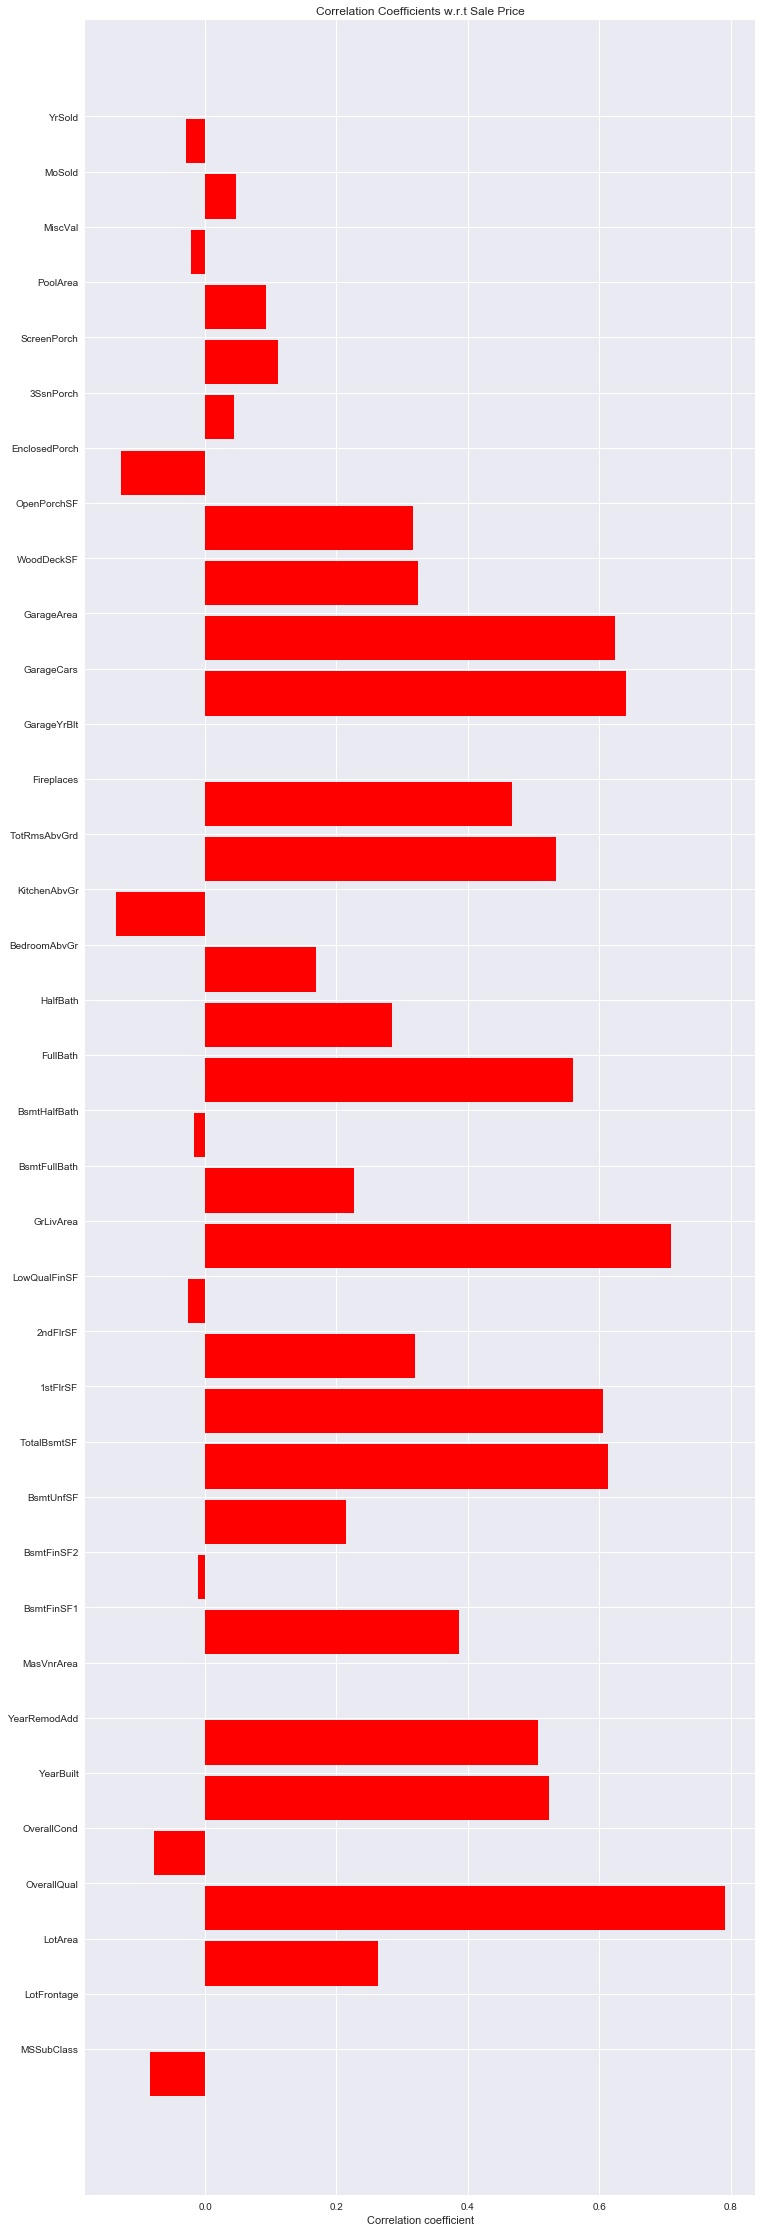

In [10]:
#绘制相关性图表
num_feat=houses.columns[houses.dtypes!=object]
num_feat=num_feat[1:-1] 
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(np.corrcoef(houses[col].values, houses.SalePrice.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price");

In [11]:
correlations=houses.corr()
attrs = correlations.iloc[:-1,:-1] #目标变量除外

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

     #以绝对值进行分类
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

,Attribute Pair,Correlation
9,"(GarageArea, GarageCars)",0.882475
8,"(GarageYrBlt, YearBuilt)",0.825667
20,"(GrLivArea, TotRmsAbvGrd)",0.825489
3,"(1stFlrSF, TotalBsmtSF)",0.819530
5,"(2ndFlrSF, GrLivArea)",0.687501
18,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
0,"(BsmtFinSF1, BsmtFullBath)",0.649212
19,"(GarageYrBlt, YearRemodAdd)",0.642277
23,"(FullBath, GrLivArea)",0.630012
13,"(2ndFlrSF, TotRmsAbvGrd)",0.616423



这显示了多重共线性。
在线性回归模型中，多重共线性是指特征与其他多个特征相关。当你的模型包含有多个与目标变量相关的因素，而这些因素也相关影响时，即为多重共线性发生。

问题:

多重共线性会增加了这些系数的标准误差。
这意味着，多重共线性会使一些本应该显著的变量，变得没有那么显著。

三种方式可避免这种情况:

1. 完全删除这些变量
2. 通过添加或一些操作，增加新的特征变量
3. 通过PCA(Principal Component Analysis,主成分分析), 来减少特征变量的多重共线性.

参考:http://blog.minitab.com/blog/understanding-statistics/handling-multicollinearity-in-regression-analysis


**热力图**
-----------

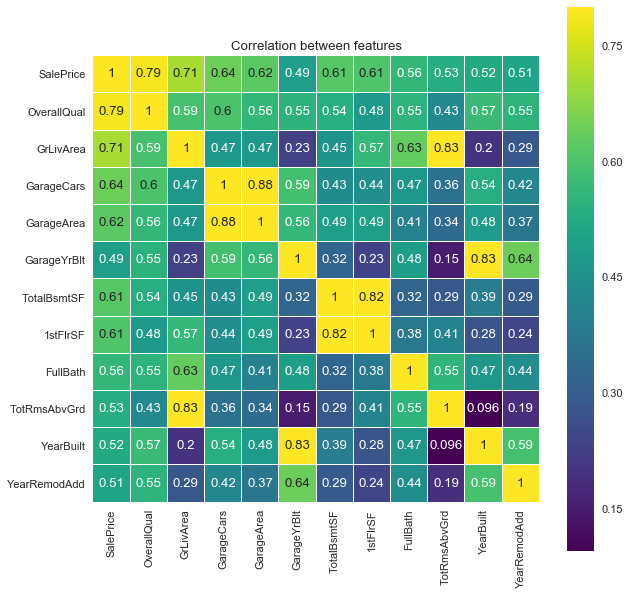

In [12]:
corrMatrix=houses[["SalePrice","OverallQual","GrLivArea","GarageCars",
                  "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF","FullBath",
                  "TotRmsAbvGrd","YearBuilt","YearRemodAdd"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');


如我们所见,热力图中只有少量特征变量表现出显著的多重共线性。让我们聚焦到对角线的黄色方块和线框出的少量黄色区域。

SalePrice and OverallQual

GarageArea and GarageCars

TotalBsmtSF and 1stFlrSF

GrLiveArea and TotRmsAbvGrd

YearBulit and GarageYrBlt

在我们用这些变量进行预测之前，我们不得不新建一个源于这些变量的单特征变量



*关键特征*
------------------------

In [13]:
houses[['OverallQual','SalePrice']].groupby(['OverallQual'],
as_index=False).mean().sort_values(by='OverallQual', ascending=False)

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


In [14]:
houses[['GarageCars','SalePrice']].groupby(['GarageCars'],
as_index=False).mean().sort_values(by='GarageCars', ascending=False)

,GarageCars,SalePrice
4,4,192655.800000
3,3,309636.121547
2,2,183851.663835
1,1,128116.688347
0,0,103317.283951


In [15]:
houses[['Fireplaces','SalePrice']].groupby(['Fireplaces'],
as_index=False).mean().sort_values(by='Fireplaces', ascending=False)

,Fireplaces,SalePrice
3,3,252000.000000
2,2,240588.539130
1,1,211843.909231
0,0,141331.482609




*目标变量的可视化*
-----------------


*单变量分析*
--------------------

1个单变量是如何分布在一个数值区间上。
它的统计特征是什么。
它是正偏分布，还是负偏分布。

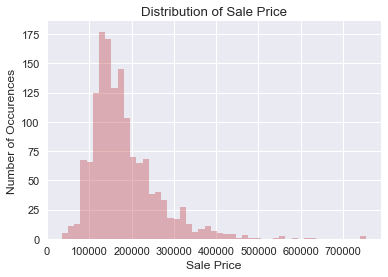

In [16]:
sns.distplot(houses['SalePrice'], color="r", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price");



售价为正偏分布，图表显示了一些峰度。

In [17]:
#偏度

houses['SalePrice'].skew()

1.8828757597682129

In [18]:
#峰度

houses['SalePrice'].kurt()

6.536281860064529

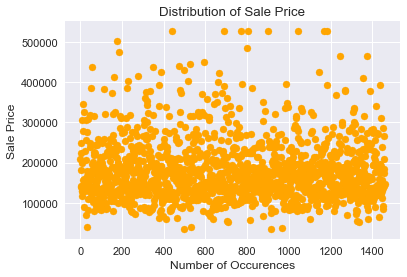

In [19]:
#删除异常值
upperlimit = np.percentile(houses.SalePrice.values, 99.5)
houses['SalePrice'].ix[houses['SalePrice']>upperlimit] = upperlimit

plt.scatter(range(houses.shape[0]), houses["SalePrice"].values,color='orange')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Occurences")
plt.ylabel("Sale Price");

# **缺失值处理**
====================

训练数据集中的缺失值可能会对模型的预测或分类产生负面影响。

有一些机器学习算法对数据缺失敏感，例如支持向量机 SVM（Support Vector Machine）

但是使用平均数/中位数/众数来填充缺失值或使用其他预测模型来预测缺失值也不可能实现100％准确预测，比较可取的方式是你可以使用决策树和随机森林等模型来处理缺失值。

In [20]:
# 查看是否有有缺失值的列
null_columns=houses.columns[houses.isnull().any()]
houses[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

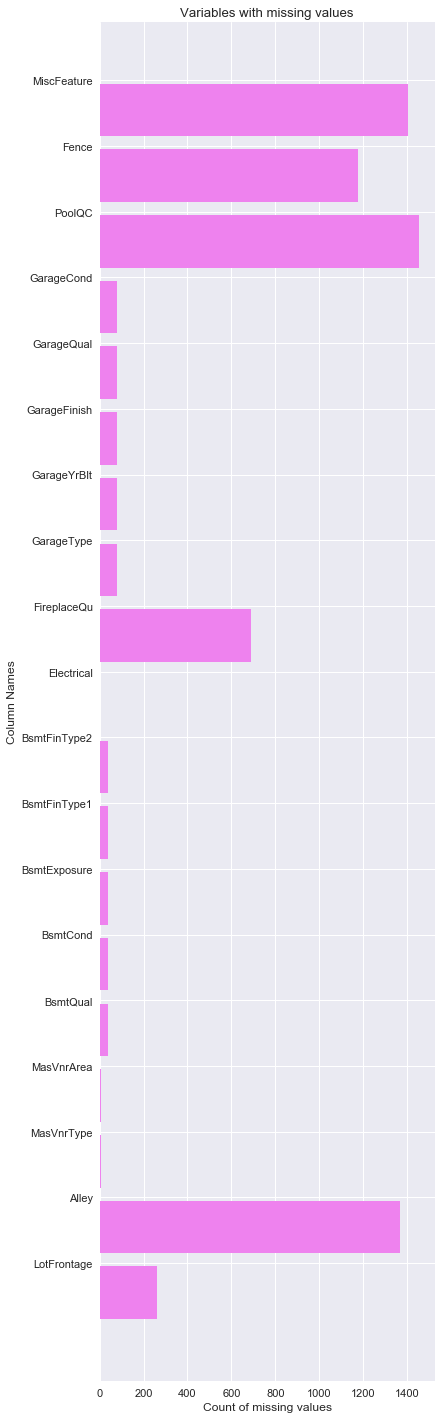

In [21]:
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(houses[col].isnull().sum())
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(6,25))
rects = ax.barh(ind, np.array(values), color='violet')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values");



*多变量分析*
--------------------

当我们去理解3个及以上变量之间的相互影响。


*临街距离*
-------------

我们可以看看占地面积和临街距离之间是否存在某种关联。

In [22]:
houses['LotFrontage'].corr(houses['LotArea'])

0.42609501877180794



这看起来不好，我们可以试试一些多项式表达式，如平方根

In [23]:
houses['SqrtLotArea']=np.sqrt(houses['LotArea'])
houses['LotFrontage'].corr(houses['SqrtLotArea'])

0.6020022167939361



0.60看起来不错

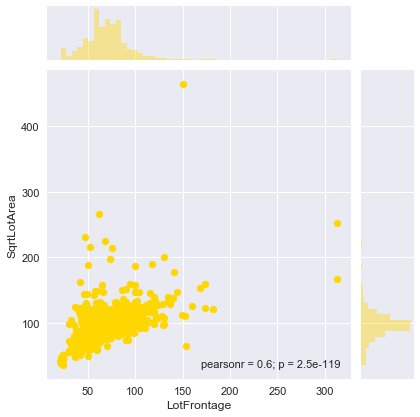

In [24]:
sns.jointplot(houses['LotFrontage'],houses['SqrtLotArea'],color='gold');

In [25]:
filter = houses['LotFrontage'].isnull()
houses.LotFrontage[filter]=houses.SqrtLotArea[filter]



*砌体单板类型 and 砌体单板面积*
===========================

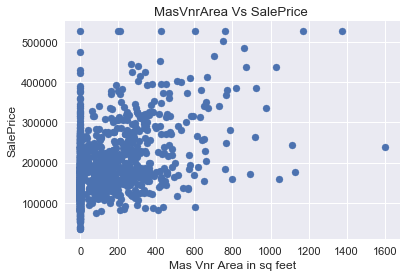

In [26]:
plt.scatter(houses["MasVnrArea"],houses["SalePrice"])
plt.title("MasVnrArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Mas Vnr Area in sq feet");

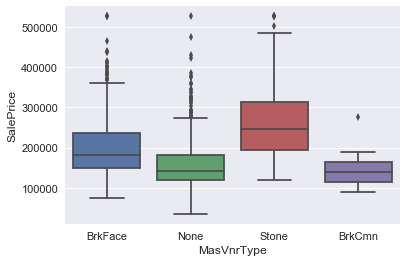

In [27]:
sns.boxplot("MasVnrType","SalePrice",data=houses);

In [28]:
houses["MasVnrType"] = houses["MasVnrType"].fillna('None')
houses["MasVnrArea"] = houses["MasVnrArea"].fillna(0.0)


*双变量分析*
--------------------

我们可以尝试去找出数据集中的2个参数是如何相互关联的。 从某种意义上说，当一个参数减少时，另一个参数也减少，或者当一个参数增加时，另一个参数也增加，即为正相关

当一个参数增加，另一个参数减少，或者反之亦然，即为负相关。



*电气系统*
------------

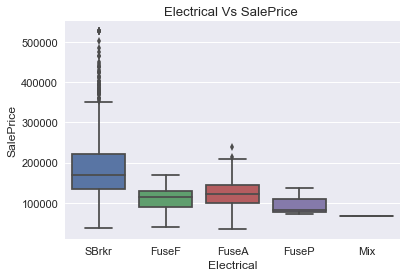

In [29]:
sns.boxplot("Electrical","SalePrice",data=houses)
plt.title("Electrical Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Electrical");

In [30]:
#我们可以用最常见的数值去替代缺失值。
houses["Electrical"] = houses["Electrical"].fillna('SBrkr')


*小巷*
-------

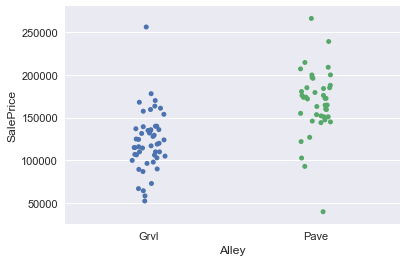

In [31]:
sns.stripplot(x=houses["Alley"], y=houses["SalePrice"],jitter=True);


所有缺失值表示特定房屋没有小巷入口。我们可以用'None'来替代。

In [32]:
houses["Alley"] = houses["Alley"].fillna('None')

*地下室特征*
-------------------

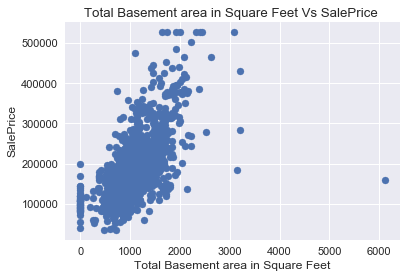

In [33]:
plt.scatter(houses["TotalBsmtSF"],houses["SalePrice"])
plt.title("Total Basement area in Square Feet Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement area in Square Feet");

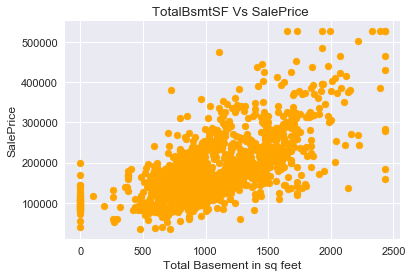

In [34]:
#地下室总面积，有几个的异常值，让我们去除这些值
upperlimit = np.percentile(houses.TotalBsmtSF.values, 99.5)
houses['TotalBsmtSF'].ix[houses['TotalBsmtSF']>upperlimit] = upperlimit

plt.scatter(houses.TotalBsmtSF, houses["SalePrice"].values,color='orange')
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement in sq feet");

In [35]:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
houses[basement_cols][houses['BsmtQual'].isnull()==True]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
17,NaN,NaN,NaN,NaN,NaN,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0



所有的包含有NAN的分类变量，含有0值的连续变量。
意味着这些房屋没有地下室。
我们可以用'None'来替代。

In [36]:
for col in basement_cols:
    if 'FinSF'not in col:
        houses[col] = houses[col].fillna('None')


*壁炉*
------------

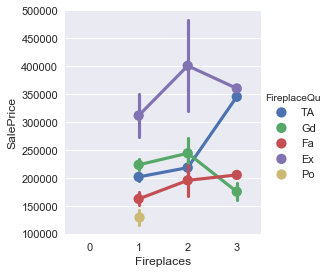

In [37]:
sns.factorplot("Fireplaces","SalePrice",data=houses,hue="FireplaceQu");



有2个壁炉可以提升房价，优质壁炉也是一大卖点。

In [38]:
#如果壁炉质量存在缺失值，意味着房屋没有壁炉
houses["FireplaceQu"] = houses["FireplaceQu"].fillna('None')
pd.crosstab(houses.Fireplaces, houses.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,None,Po,TA
Fireplaces,,,,,,
0,0,0,0,690,0,0
1,19,28,324,0,20,259
2,4,4,54,0,0,53
3,1,1,2,0,0,1




*车库*
---------

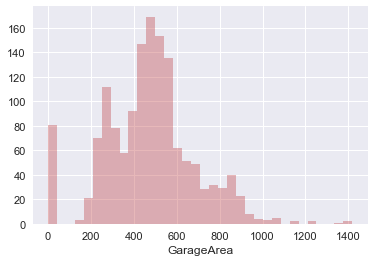

In [39]:
sns.distplot(houses["GarageArea"],color='r', kde=False);

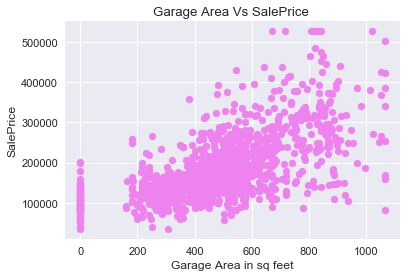

In [40]:
#车库面积存在一些异常值，去除这些异常值
upperlimit = np.percentile(houses.GarageArea.values, 99.5)
houses['GarageArea'].ix[houses['GarageArea']>upperlimit] = upperlimit

plt.scatter(houses.GarageArea, houses["SalePrice"].values,color='violet')
plt.title("Garage Area Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Garage Area in sq feet");

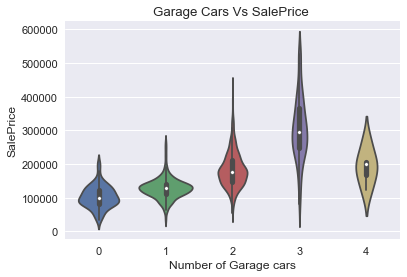

In [41]:
sns.violinplot(houses["GarageCars"],houses["SalePrice"])
plt.title("Garage Cars Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Number of Garage cars");

In [42]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
houses[garage_cols][houses['GarageType'].isnull()==True]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0.0
48,NaN,NaN,NaN,NaN,NaN,0,0.0
78,NaN,NaN,NaN,NaN,NaN,0,0.0
88,NaN,NaN,NaN,NaN,NaN,0,0.0
89,NaN,NaN,NaN,NaN,NaN,0,0.0
99,NaN,NaN,NaN,NaN,NaN,0,0.0
108,NaN,NaN,NaN,NaN,NaN,0,0.0
125,NaN,NaN,NaN,NaN,NaN,0,0.0
127,NaN,NaN,NaN,NaN,NaN,0,0.0
140,NaN,NaN,NaN,NaN,NaN,0,0.0



所有与车库相关的变量在同一行存在缺失值。
意味着我们可以用None来替代分类变量，用0来替代这些连续变量。

In [43]:
for col in garage_cols:
    if houses[col].dtype==np.object:
        houses[col] = houses[col].fillna('None')
    else:
        houses[col] = houses[col].fillna(0)


*泳池*
-----------------------

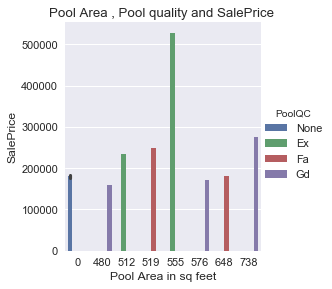

In [44]:
#如果泳池面积为0，则意味这些房屋没有泳池。
#因此，我们可以用None来替代泳池质量。
houses["PoolQC"] = houses["PoolQC"].fillna('None')
sns.factorplot("PoolArea","SalePrice",data=houses,hue="PoolQC",kind='bar')
plt.title("Pool Area , Pool quality and SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Pool Area in sq feet");


*栅栏*
-----------------------

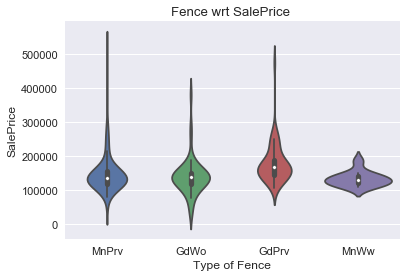

In [45]:
sns.violinplot(houses["Fence"],houses["SalePrice"])
plt.title("Fence wrt SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of Fence");


栅栏含有1179个空值。
我们可以确定假设那些房屋没有栅栏，并用None替换这些值。

In [46]:
houses["Fence"] = houses["Fence"].fillna('None')


*其他特征*
-----------------------

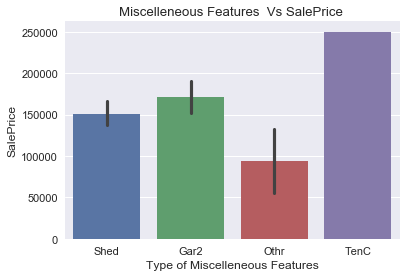

In [47]:
sns.barplot(houses["MiscFeature"],houses["SalePrice"])
plt.title("Miscelleneous Features  Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of Miscelleneous Features");

In [48]:
#一些房屋没有其他特征，如棚子、网球场等等
houses["MiscFeature"] = houses["MiscFeature"].fillna('None')

In [49]:
#让我们确认我们已经删除了所有缺失值
houses[null_columns].isnull().sum()

LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64



**数据可视化**
==================


*分区划分*
-----------

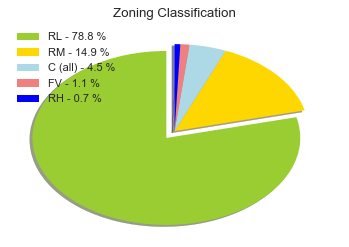

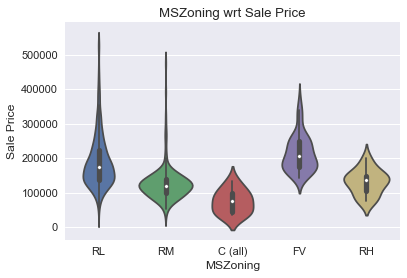

In [50]:

labels = houses["MSZoning"].unique()
sizes = houses["MSZoning"].value_counts().values
explode=[0.1,0,0,0,0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels, parcent)]

colors = ['yellowgreen', 'gold', 'lightblue', 'lightcoral','blue']
patches, texts= plt.pie(sizes, colors=colors,explode=explode,
                        shadow=True,startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification")
plt.show()



sns.violinplot(houses.MSZoning,houses["SalePrice"])
plt.title("MSZoning wrt Sale Price")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price");


*以平方英尺计算的1层面积*
--------------------------

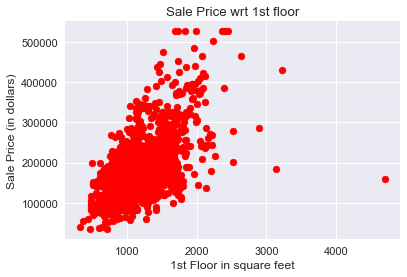

In [51]:
plt.scatter(houses["1stFlrSF"],houses.SalePrice, color='red')
plt.title("Sale Price wrt 1st floor")
plt.ylabel('Sale Price (in dollars)')
plt.xlabel("1st Floor in square feet");


*地面生活区的售价*
--------------------

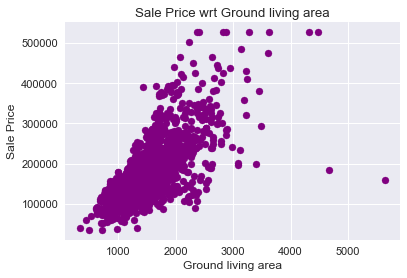

In [52]:
plt.scatter( houses["GrLivArea"],houses["SalePrice"],color='purple')
plt.title("Sale Price wrt Ground living area")
plt.ylabel('Sale Price')
plt.xlabel("Ground living area");


*每平方英尺单价*
--------------------

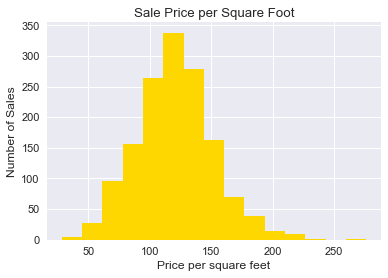

In [53]:
houses['SalePriceSF'] = houses['SalePrice']/houses['GrLivArea']
plt.hist(houses['SalePriceSF'], bins=15,color="gold")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet');

In [54]:
#每平方英尺的平均售价
print("$",houses.SalePriceSF.mean())

$ 120.42996589363516



*车库面积*
-------------

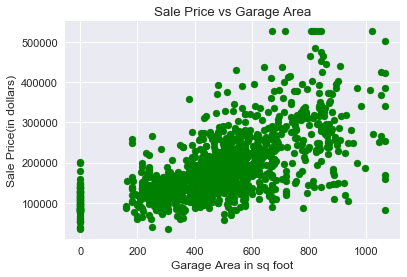

In [55]:
plt.scatter(houses["GarageArea"],houses.SalePrice, color='green')
plt.title("Sale Price vs Garage Area")
plt.ylabel('Sale Price(in dollars)')
plt.xlabel("Garage Area in sq foot");


*建筑年份，改造年份、房龄*
----------------------------------------

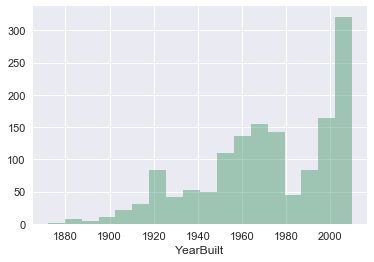

In [56]:
sns.distplot(houses["YearBuilt"],color='seagreen', kde=False);

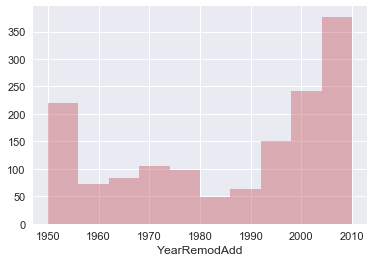

In [57]:
sns.distplot(houses["YearRemodAdd"].astype(int),color='r', kde=False);

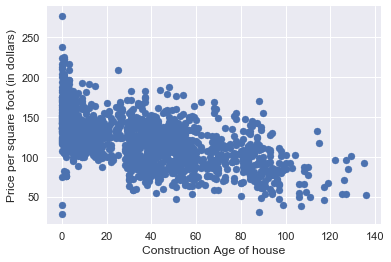

In [58]:
houses['ConstructionAge'] = houses['YrSold'] - houses['YearBuilt']
plt.scatter(houses['ConstructionAge'], houses['SalePriceSF'])
plt.ylabel('Price per square foot (in dollars)')
plt.xlabel("Construction Age of house");


房价与房龄成反比.


*暖气和交流电布置*
-----------------------------

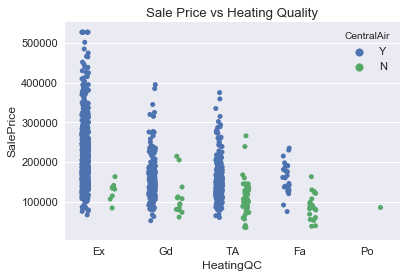

In [59]:
sns.stripplot(x="HeatingQC", y="SalePrice",data=houses,hue='CentralAir',jitter=True,split=True)
plt.title("Sale Price vs Heating Quality");


有交流电布置的房屋，售价更高。


*房屋里的浴室*
--------------------------

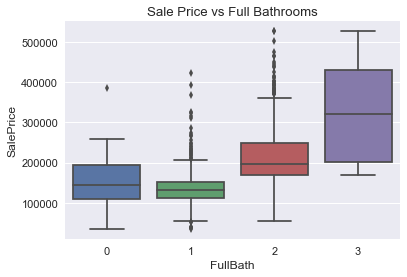

In [60]:
sns.boxplot(houses["FullBath"],houses["SalePrice"])
plt.title("Sale Price vs Full Bathrooms");

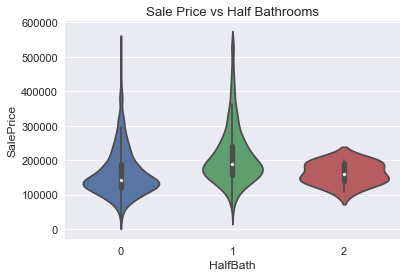

In [61]:
sns.violinplot( houses["HalfBath"],houses["SalePrice"])
plt.title("Sale Price vs Half Bathrooms");


*地面以上的总房间数*
-------------------------

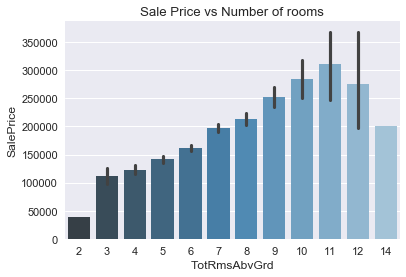

In [62]:
sns.barplot(houses["TotRmsAbvGrd"],houses["SalePrice"],palette="Blues_d")
plt.title("Sale Price vs Number of rooms");


*厨房质量*
=================

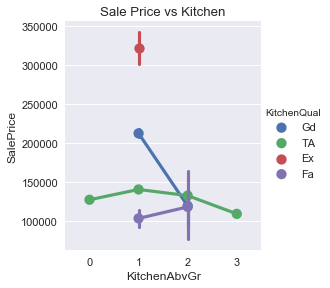

In [63]:
sns.factorplot("KitchenAbvGr","SalePrice",data=houses,hue="KitchenQual")
plt.title("Sale Price vs Kitchen");


有1个高质量的厨房能够显著的提高房屋售价.


*街区*
--------------

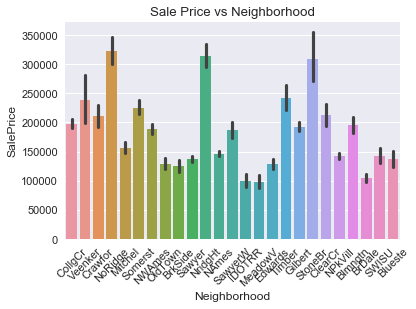

In [64]:
plt.xticks(rotation=45) 
sns.barplot(houses["Neighborhood"],houses["SalePrice"])
plt.title("Sale Price vs Neighborhood");


*整体质量*
-----------------

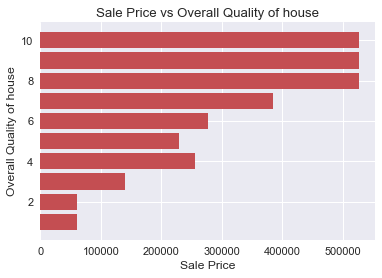

In [65]:
plt.barh(houses["OverallQual"],width=houses["SalePrice"],color="r")
plt.title("Sale Price vs Overall Quality of house")
plt.ylabel("Overall Quality of house")
plt.xlabel("Sale Price");


*二层售价*
--------------------------

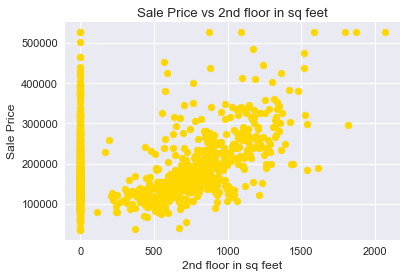

In [66]:
plt.scatter(houses["2ndFlrSF"],houses["SalePrice"],color="gold")
plt.title("Sale Price vs 2nd floor in sq feet");
plt.xlabel("2nd floor in sq feet")
plt.ylabel("Sale Price");


*街道*
--------

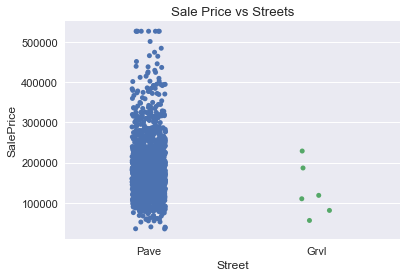

In [67]:
#大多数街道已铺好，让我们可视化它
sns.stripplot(x=houses["Street"], y=houses["SalePrice"],jitter=True)
plt.title("Sale Price vs Streets");